In [30]:
import pandas as pd

In [31]:
data_path = '../../data'
report_path = '../../reports'

data_model_output = pd.read_csv(f'{data_path}/processed/data_model_output.csv')
weight_col = 'weight_departing_only'

output_excel_path = f"{report_path}/zonal_distribution_resident_passengers.xlsx"
survey_data_path = f'{data_path}/processed/data_model_output.csv'

pmsa_geom_path = f"{data_path}/external/geometry/pmsa_geoms/pmsa_geoms.shp"
muni_boundary_path = f"{data_path}/external/geometry/Municipal_Boundaries/Municipal_Boundaries.shp"

C:\Users\mwe\AppData\Local\Temp\ipykernel_15040\1963240492.py:4: DtypeWarning: Columns (1,13,14,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,54,55,59,65,69,74,77,78,80,82,83,86,93,95,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,132,142,147,150,151,152,155,156,157,167,169,177,179,196,197,198,201,210,211,216,223,237,239,240,241,242,243,244,246,248,249,273,283,284,285,288,291,295,296,297,299,300,335,337,338,340,411,414,435) have mixed types. Specify dtype option on import or set low_memory=False.
  data_model_output = pd.read_csv(f'{data_path}/processed/data_model_output.csv')


In [32]:
data_model_output.head()

,unique_id,respondentid,is_completed,is_valid_record,date_completed,time_completed,is_pilot,is_self_administered,record_type_synthetic,access_mode,...,validation_num_errors_person,validation_num_errors_trip,validation_severity_person,validation_severity_trip,model_respondent_bool,weight_departing_and_arriving,weight_departing_only,weight_departing_only_model_respondents,weight_non_sas_departing_only,weight_departing_only_with_time_of_day
0,1,5473,True,True,2024-10-04,08:41:12,False,False,0,NaN,...,0,0,NaN,NaN,True,10.840259,11.525574,11.622594,19.179428,10.874504
1,2,5476,True,True,2024-10-04,08:40:04,False,False,0,1.0,...,0,0,NaN,NaN,True,6.487856,3.355533,3.346428,8.687559,6.502862
2,3,5489,True,True,2024-10-04,08:51:36,False,False,0,NaN,...,0,0,NaN,NaN,True,10.840259,11.525574,11.622594,19.179428,10.874504
3,4,5558,True,True,2024-10-04,10:32:58,False,False,0,1.0,...,0,0,NaN,NaN,True,6.487856,3.355533,3.346428,8.687559,6.502862
4,5,5593,True,True,2024-10-04,11:09:46,False,False,0,1.0,...,0,0,NaN,NaN,True,6.487856,3.355533,3.346428,8.687559,6.502862


In [33]:
import pandas as pd

# Filter data for relevant passenger segments
filtered_data = data_model_output[
    data_model_output['passenger_segment_label'].isin(['RESIDENT_ARRIVING', 'RESIDENT_DEPARTING'])
]

# Create new columns for municipal_zone and pmsa based on passenger segment type
filtered_data['municipal_zone'] = filtered_data.apply(
    lambda row: row['destination_municipal_zone'] if row['passenger_segment_label'] == 'RESIDENT_ARRIVING' else row['origin_municipal_zone'],
    axis=1
)

filtered_data['pmsa'] = filtered_data.apply(
    lambda row: row['destination_pmsa'] if row['passenger_segment_label'] == 'RESIDENT_ARRIVING' else row['origin_pmsa'],
    axis=1
)

# Adjust party size and create weighted party size
filtered_data['party_size_weighted'] = filtered_data['party_size_flight'] * filtered_data[weight_col]

# Define a function to generate the required summaries
def generate_summaries(group_col):
    summary_weight = filtered_data.groupby(group_col).agg(
        weighted_num_travelers = ('party_size_weighted', 'sum'),
        weighted_num_parties = (weight_col, 'sum')
    ).reset_index()

    summary_respondents_all = filtered_data.groupby(group_col).agg(
        num_travelers_all = ('party_size_flight', 'sum'),
        num_travel_parties_all = ('unique_id', 'count')
    ).reset_index()

    summary_respondents_non_synthetic = filtered_data[filtered_data['record_type_synthetic'] == 0].groupby(group_col).agg(
        num_travelers_non_synthetic = ('party_size_flight', 'sum'),
        num_travel_parties_non_synthetic = ('unique_id', 'count')
    ).reset_index()

    return summary_weight, summary_respondents_all, summary_respondents_non_synthetic

# Generate summaries for municipal_zone
summary_municipal_zone_weight, summary_municipal_zone_respondents_all, summary_municipal_zone_respondents_non_synthetic = generate_summaries('municipal_zone')

# Generate summaries for pmsa
summary_pmsa_weight, summary_pmsa_respondents_all, summary_pmsa_respondents_non_synthetic = generate_summaries('pmsa')

C:\Users\mwe\AppData\Local\Temp\ipykernel_15040\4074351896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['municipal_zone'] = filtered_data.apply(
C:\Users\mwe\AppData\Local\Temp\ipykernel_15040\4074351896.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pmsa'] = filtered_data.apply(
C:\Users\mwe\AppData\Local\Temp\ipykernel_15040\4074351896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [34]:
# Merge summaries for municipal_zone
# Merge summaries for municipal_zone
summary_municipal_zone = (
    summary_municipal_zone_weight
    .merge(summary_municipal_zone_respondents_all, on='municipal_zone', how='outer')
    .merge(summary_municipal_zone_respondents_non_synthetic, on='municipal_zone', how='outer')
)

#Change column order
summary_municipal_zone = summary_municipal_zone[['municipal_zone', 'num_travel_parties_non_synthetic','num_travel_parties_all', 'weighted_num_parties', 'num_travelers_non_synthetic', 'num_travelers_all', 'weighted_num_travelers']]

#Move external to end
# Separate rows with 'EXTERNAL' and others
external_row = summary_municipal_zone[summary_municipal_zone["municipal_zone"] == "EXTERNAL"]
other_rows = summary_municipal_zone[summary_municipal_zone["municipal_zone"] != "EXTERNAL"]

# Concatenate with 'EXTERNAL' at the end
summary_municipal_zone = pd.concat([other_rows, external_row], ignore_index=True)


# Merge summaries for pmsa
summary_pmsa = (
    summary_pmsa_weight
    .merge(summary_pmsa_respondents_all, on='pmsa', how='outer')
    .merge(summary_pmsa_respondents_non_synthetic, on='pmsa', how='outer')
)
#Change column order
summary_pmsa = summary_pmsa[['pmsa', 'num_travel_parties_non_synthetic','num_travel_parties_all', 'weighted_num_parties','num_travelers_non_synthetic', 'num_travelers_all', 'weighted_num_travelers']]

# Write to an Excel file with two sheets
with pd.ExcelWriter(output_excel_path) as writer:
    summary_municipal_zone.to_excel(writer, sheet_name="Municipal Zone Summary", index=False)
    summary_pmsa.to_excel(writer, sheet_name="PMSA Summary", index=False)

In [35]:
summary_municipal_zone

,municipal_zone,num_travel_parties_non_synthetic,num_travel_parties_all,weighted_num_parties,num_travelers_non_synthetic,num_travelers_all,weighted_num_travelers
0,CARLSBAD,78,155,155.357832,115,229,260.515808
1,CHULA VISTA,110,214,279.499700,201,391,785.644947
2,CORONADO,20,40,46.478369,33,66,91.871767
3,DEL MAR,14,27,27.121919,19,37,42.345149
4,EL CAJON,40,77,90.321002,71,137,181.021863
5,ENCINITAS,45,89,88.838208,63,124,156.097332
6,ESCONDIDO,46,92,124.063496,83,166,330.463413
7,IMPERIAL BEACH,8,16,15.537056,10,20,20.329713
8,LA MESA,34,66,61.063990,46,87,81.536946
9,LEMON GROVE,7,14,17.233623,11,22,29.296615


In [36]:
summary_pmsa

,pmsa,num_travel_parties_non_synthetic,num_travel_parties_all,weighted_num_parties,num_travelers_non_synthetic,num_travelers_all,weighted_num_travelers
0,1.0,81,155,173.835963,135,257,434.804079
1,2.0,442,846,907.818345,711,1361,1858.356790
2,3.0,528,1028,1176.797300,838,1629,2513.783113
3,4.0,141,274,332.009527,243,469,856.243745
4,5.0,164,321,365.740983,267,522,756.542924
5,6.0,232,457,464.785446,334,658,817.429223
6,7.0,110,217,281.521437,206,402,728.115611
7,8.0,4,8,10.597410,6,12,20.238213
8,99.0,166,293,373.646990,327,591,1247.330570


### Generate Maps to visualize

C:\Users\mwe\AppData\Local\Temp\ipykernel_15040\3286304922.py:7: DtypeWarning: Columns (1,13,14,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,54,55,59,65,69,74,77,78,80,82,83,86,93,95,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,132,142,147,150,151,152,155,156,157,167,169,177,179,196,197,198,201,210,211,216,223,237,239,240,241,242,243,244,246,248,249,273,283,284,285,288,291,295,296,297,299,300,335,337,338,340,411,414,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(survey_data_path)


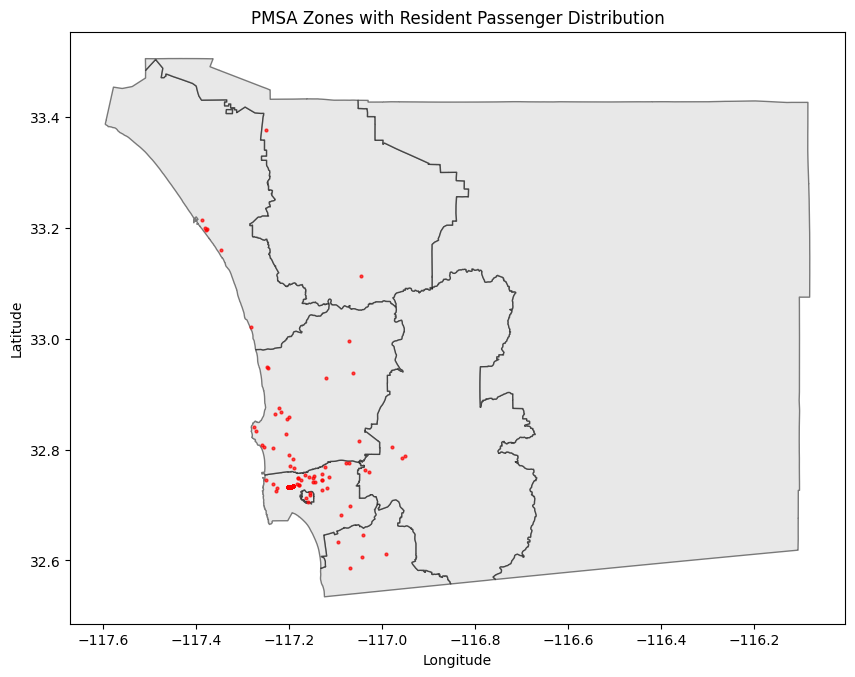

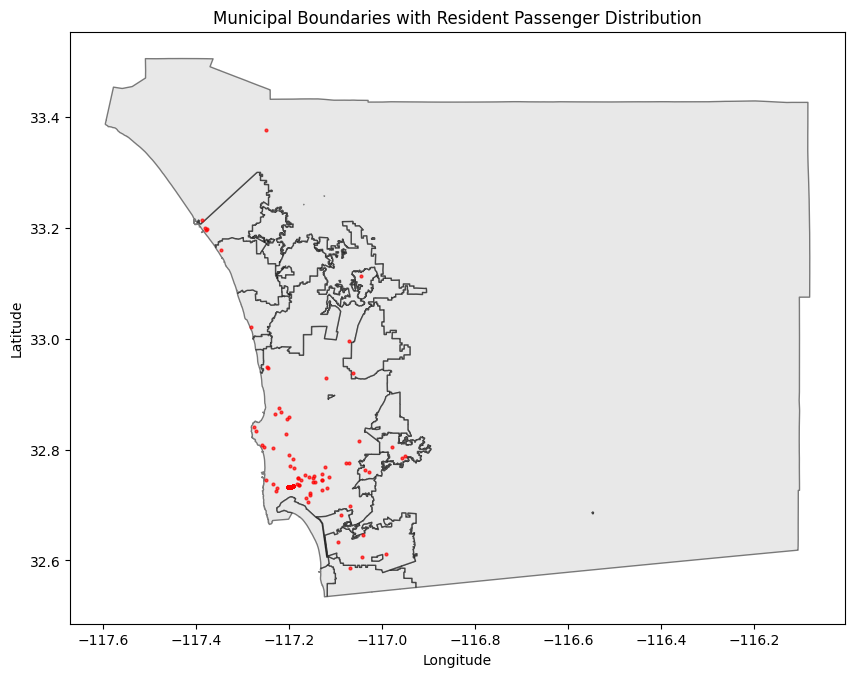

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv(survey_data_path)

# Create resident_latitude, resident_longitude, and pmsa fields
filtered_df = df[
    (df["record_type_synthetic"] == 0) & (df['is_completed'] == 1) &
    (df["passenger_segment_label"].isin(["RESIDENT_ARRIVING", "RESIDENT_DEPARTING"]))
].copy()

filtered_df["resident_latitude"] = filtered_df.apply(
    lambda row: row["origin_latitude"] if row["passenger_type_label"] == "RESIDENT_ARRIVING" else row["destination_latitude"], axis=1)
filtered_df["resident_longitude"] = filtered_df.apply(
    lambda row: row["origin_longitude"] if row["passenger_type_label"] == "RESIDENT_ARRIVING" else row["destination_longitude"], axis=1)
filtered_df["pmsa"] = filtered_df.apply(
    lambda row: row["origin_pmsa"] if row["passenger_type_label"] == "RESIDENT_ARRIVING" else row["destination_pmsa"], axis=1)

# Filter out pmsa == 99
filtered_df = filtered_df[filtered_df["pmsa"] != 99]

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(filtered_df['resident_longitude'], filtered_df['resident_latitude'])]
coords_gdf = gpd.GeoDataFrame(filtered_df, geometry=geometry, crs="EPSG:4326")

# Load PMSA and Municipal zones shapefiles
pmsa_zones_gdf = gpd.read_file(pmsa_geom_path).to_crs(epsg=4326)
municipal_zones_gdf = gpd.read_file(muni_boundary_path).to_crs(epsg=4326)

# Plot PMSA Zones with Points
fig, ax = plt.subplots(figsize=(10, 10))
pmsa_zones_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
coords_gdf.plot(ax=ax, markersize=4, color='red', alpha=0.7)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("PMSA Zones with Resident Passenger Distribution")
plt.show()

# Plot Municipal Boundaries with Points
fig, ax = plt.subplots(figsize=(10, 10))
municipal_zones_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
coords_gdf.plot(ax=ax, markersize=4, color='red', alpha=0.7)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Municipal Boundaries with Resident Passenger Distribution")
plt.show()
